# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
plt.plot?

Matplotlib's pyplot is an example of a procedural method for building visualizations while SVG, HTML are declarative methods of creating visualizations.

<IPython.core.display.Javascript object>


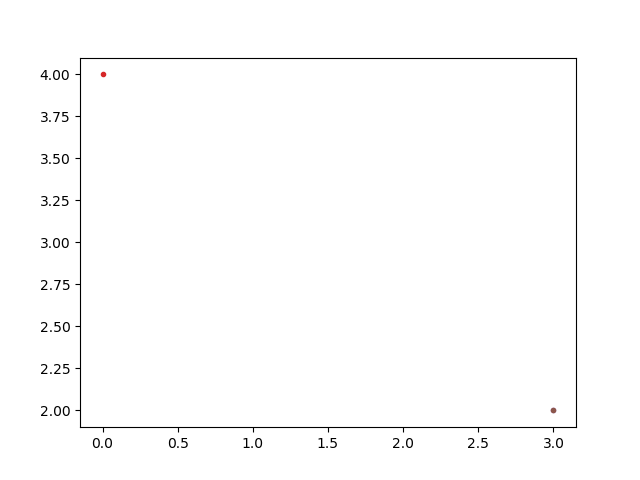

In [7]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

<IPython.core.display.Javascript object>


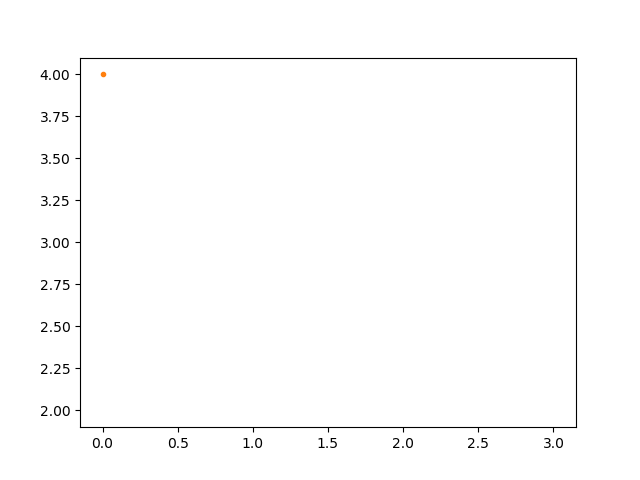

In [12]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

In [13]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [14]:
%%html
<img src='test.png' />

This example below sets the window of the plot:

<IPython.core.display.Javascript object>


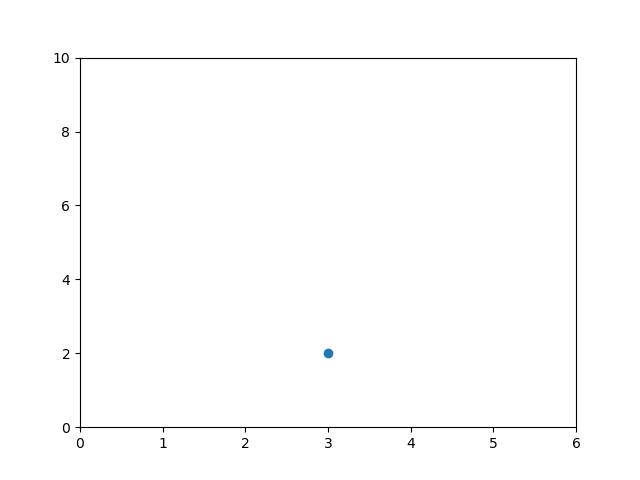

[0, 6, 0, 10]

In [15]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

Since pyplot is procedural, it works somewhat similarly to ggplot2 in R where if you add points to the plot, they are added procedurally as the user types them into the script. This can be seen below. Note that working this way, by default the colors of each point are different as well.

<IPython.core.display.Javascript object>


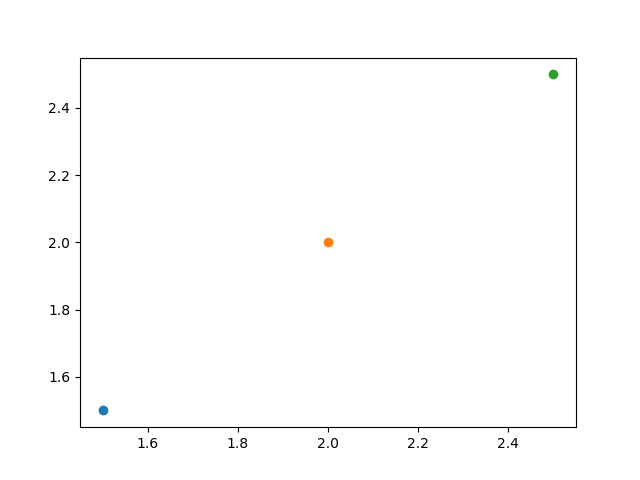

In [16]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

Using the below function, we can get all of the child objects of an axes. Here we can see that there's actually three line 2D objects contained in this axes. These are our data points. The number of spines, which are actual renderings of the borders of the frame, including tic markers, two axis objects, and a bunch of text, which are the labels for the chart. There's even a rectangle, which is the background for the axis.

In [17]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

# Scatterplots

I'll bring in numpy as we're going to use it later and matplotlib is really based on numpy arrays. I'll create a short array for x and make y the same. Then create a new figure and scatterplot. ou can see in this plot a nice diagonal line and matplotlib has sized our axises accordingly.

<IPython.core.display.Javascript object>


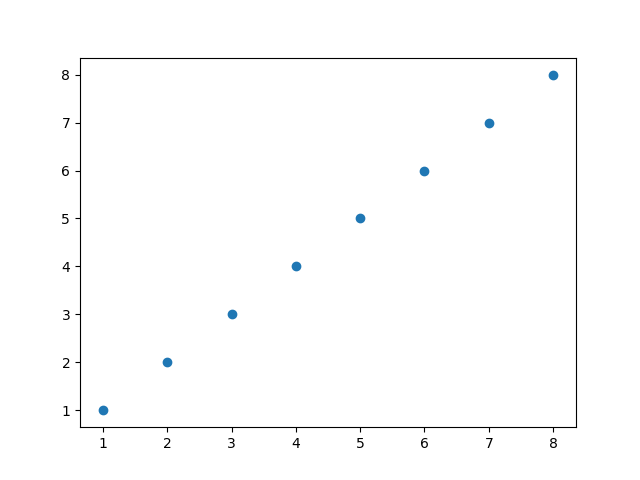

In [18]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

Now, scatter doesn't represent items as a series. Instead, we can pass it a list of colors which correspond to given points.

Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. Then we'll add a final value of red. Then we'll plot this, and we'll set the size of the data points to 100 to make it a little easier to see.

The separation of data points into lists, which describes them as components is a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same slice across many different data sources.

<IPython.core.display.Javascript object>


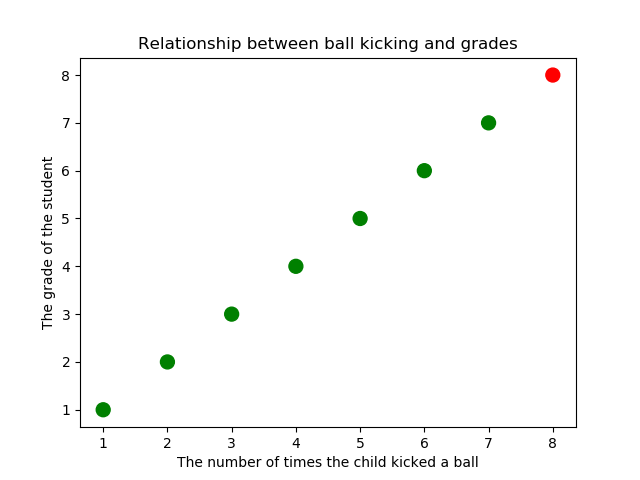

In [19]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

Recall that the zip method takes a number of iterables and creates tuples out of them, matching elements based on index. So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on. Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means we need to use the list function if we want to see the results of iterating over zip. 

Let's demonstrate. Here we'll create a new zip generator with a zip function passing in two lists of numbers. When we convert this generator to a list, we see there's a list of pairwise tuples.

In [20]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


If we want to turn the data back into two lists, one with the x component and one with the y component, we can use parameter unpacking with zip. When you pass a list or an interval more generally to a function and prepend it with an asterisk, each item is taken out of the iterable and passed as a separate argument. So we can do that here, passing into a new zip function five parameters, each of length two. Zip will then create a new two value list which is identical to our original x and y values. If we want to get even fancier, we can unpack this result into two variables directly, x and y.

In [21]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


Let's take these two lists and plot them to a new figure using scatter. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series. You'll note that we can color each series with a single value if we want to. We can also do things like change the color or transparency of an entire series, or individual data points as well. Finally, we have the ability to label the data series, and I'll do that now. This will come in handy later when building a legend.

<IPython.core.display.Javascript object>


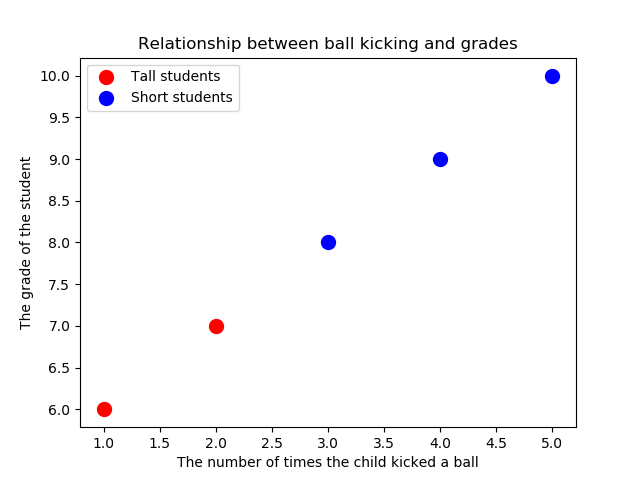

In [25]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

The axis generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place now. Since pyplot mirrors much of the axis API, we can make calls directly on pyplot. Let's do this now, adding in an xlabel, a ylabel, and then a title.

In [26]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,'Relationship between ball kicking and grades')

And let's add a legend as well.

In [27]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there. In the docs for the legend, you'll see that there are a number of different parameters and one of them is called lock. And a value of 4, we'll put it in the lower right hand corner of the axis.

In [ ]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

The legend itself is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist. 

In [28]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5,1,'Relationship between ball kicking and grades'),
 Text(0,1,''),
 Text(1,1,''),

In [29]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [30]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

First, we'll import the artist class from matplotlib. Then we'll make a recursive function which takes in an artist and some depth parameter. Then checks if the object is an artist and if so, prints out its string name. Then recurses and increases the depth for pretty printing. Finally, we can call this on the legend object itself. So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

In [31]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

We can use numpy to use a linear series of data points one through eight. We'll also create a number of quadratically increasing values as the second series. Remember that you can use broadcasting in numpy to do this efficiently. Here we can plot this, and this time I'll use the mini formatting language, task map plot lib, to draw lines between data points. We'll see the result as a two data series, the linear one at the bottom and the quadratic one at the top. Both are using dots because we use the -o flag.

<IPython.core.display.Javascript object>


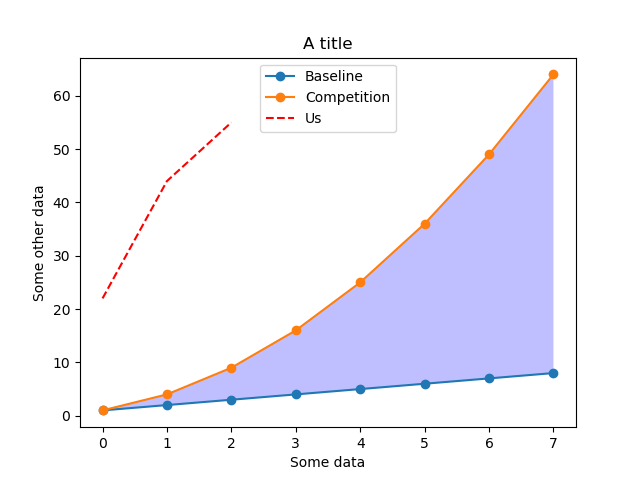

In [32]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

So there are a couple of things which are new about this versus the scatter plots. First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.

Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

Like all Python libraries matplotlib invents a string based mini language for commonly used formatting. For instance, we could use an "s" inside of the formatting string which would plot another point using a square marker. Or we could use a series of dashes and dots to identify that a line should be dashed instead of solid.  Here, let's plot another series.

In [33]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

We can use the regular axes functions creating labels for the axes and for the figure as a whole. And we can create a legend too. But note that since we didn't label the data points as we did with the scatter plot, we need to create legend entries when we add the legend itself.

In [34]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

This is a good time to introduce the fill between function of matplotlib. Now this function isn't specific to line plots, but you can see it commonly used with these plots, so I'll introduce it in this context.

Let's imagine that we want to highlight the difference between the orange and the blue curves. We could tell the access to paint a color between these series using the fill between function. First we get the current axes object, then we indicate the range of x values we want to be filled. We didn't specify any x values in our call to plot, so we'll just use the same range of data points it's already using. Then we'll put in our lower bounds and our upper bounds along with the color we want painted and for fun I'll include a transparency value. And that's all there is to it. This is a great way to show, for instance, the standard deviation of results or error bars. 

In [35]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

Let's change our x axis to a series of eight date time instances in one day intervals. Let's first create a new image. Then the NumPy arrange function which you saw previously is really helpful at sampling some dates for us. We can ask for an arrangement of dates at daily intervals just by providing the start and end dates. We can now replot our linear and exponential data against this set of dates

<IPython.core.display.Javascript object>


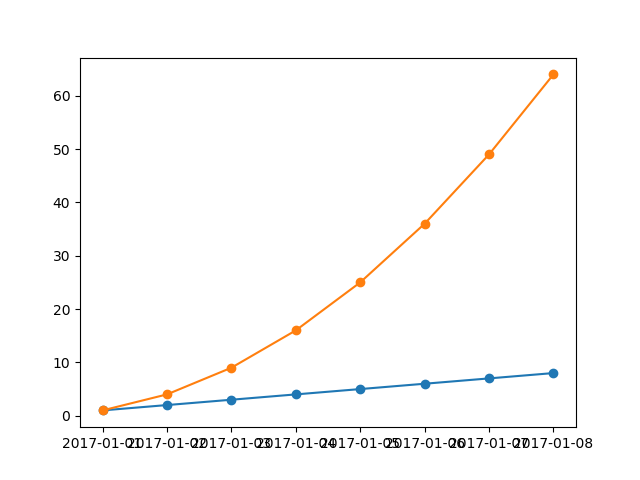

In [36]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

That didn't seem to get us the effect that we were interested in. This is unfortunately one of the great pain points in data science in Python, date time handling. The standard library does it in two different ways, while NumPy, which is used for scientific computing, does it a third way. In fact, there's probably a dozen replacement libraries for date times in Python.

The solution I'm going to use here comes from a helper library in Pandas called to datetime. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting. Let's first import Pandas then create a new figure. And let's arrange our set of dates as per the previous code block. Now I could iterate through the list, converting them. But instead I'll use the map function of the standard library. Which will apply the Pandas to datetime against each of the elements in observation_dates, and return the result. Now let's plot that result.

<IPython.core.display.Javascript object>


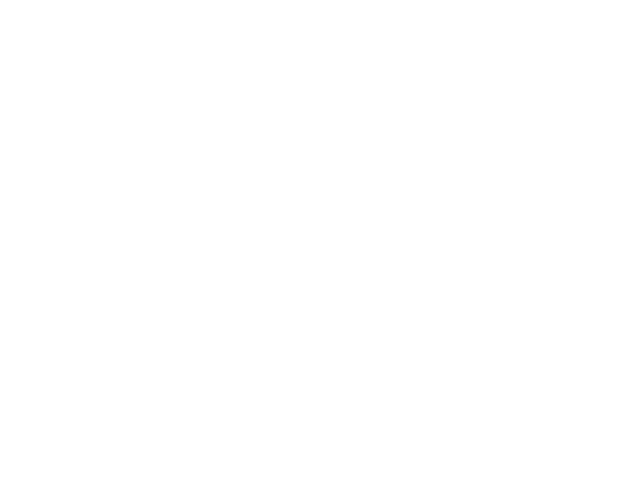

RuntimeError: matplotlib does not support generators as input

In [37]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

That resulted in error. It's a pretty confusing one at that. You see, the problem is the map function returns an iterator. Matplotlib can't handle the iterator, so we need to convert it to a list first.

This is really easy to do, but I wanted to demonstrate some of the real-world problems you can run into when you're looking to build plots in Python. And why it's important to understand, not only the toolkit, but how the language works. Here's a quick fix. We can convert the map result to a list, but keep in mind this isn't a very memory-efficient way of handling the data.

<IPython.core.display.Javascript object>


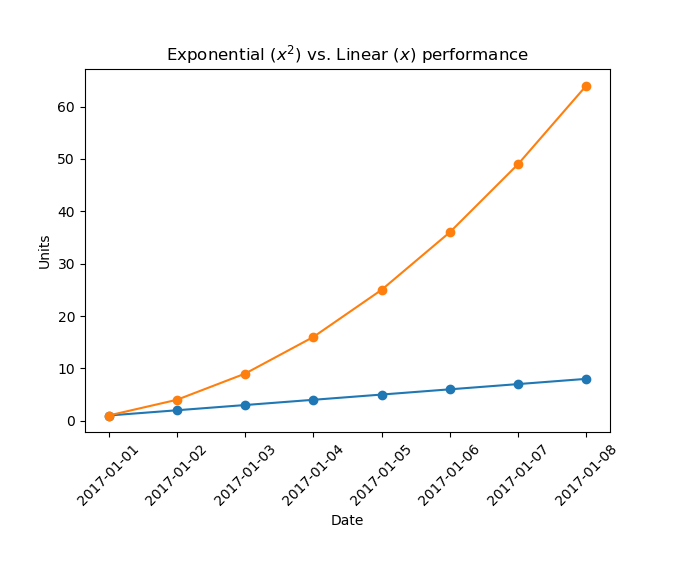

In [38]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

This produces a pretty decent looking figure with the data we want. But the dates overlap pretty heavily. Now, there's a couple of things that we could do here. For instance, everything is from 2017. So we could iterate through and change the labels by stripping the year. And add an x axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but I wanted to show you a couple of features of how matplotlib uses text. First we can get a single axis using the x-axis or y-axis properties of the axes object which we can get, remember, with GCA or get current axis.

There are lots of interesting properties of the axes object and you use some them in the assignment. For instance; you can get the grid lines, the tick locations for both major and minor ticks and so on. Just like all artists, an axes has a bunch of children which are themselves artists.

What I want to show you though, is that you can access the text of the tics using the get tick labels function. Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions. One specific to text is the set rotation function which changes the rotation based on degrees. Let's iterate through the axis labels and change that.

In [39]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

The text is a bit hard to read because it just runs off the image. So you can adjust the subplot.

In [40]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

And there we go, wonderfully readable dates in matplotlib. And when we're talking of text let me share one more insight. Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs.

In [41]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5,1,'Exponential vs. Linear performance')

In [42]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5,1,'Exponential ($x^2$) vs. Linear ($x$) performance')

# Bar Charts

Matplotlib has support for several kinds of bar charts. The most general case, we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar. Let's do this with our linear data. Here I'm going to just create a list of values as long as our linear data list. Then, we'll send this along with the linear data's bar heights, to the bar function. We pass in the width of the bar as 0.3.

<IPython.core.display.Javascript object>


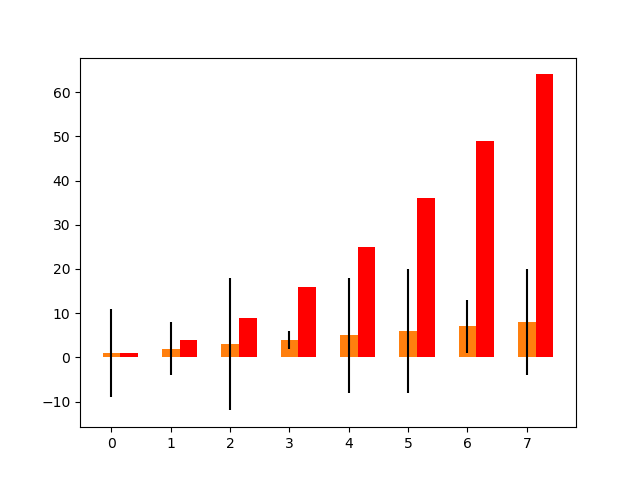

<BarContainer object of 8 artists>

In [43]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

To add a second bar, we simply call the bar plot again with new data, keeping in mind that we need to adjust the x component to make up for the first bar we plotted. Of course, we'll throw this bar in as red.

In [44]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<BarContainer object of 8 artists>

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the align parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately.

You can add error bars to each bar as well, using the y-error parameter. For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. So we could just create a list of error values. I'll import from a random function which can generate some random integers, and then I'll use a list comprehension to generate this new list. Then we could just call plt.bar again, and see our new data appear.

In [45]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

We can also do stacked bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the bottom parameter and our second plot to be equal to first set of data to plot.

<IPython.core.display.Javascript object>


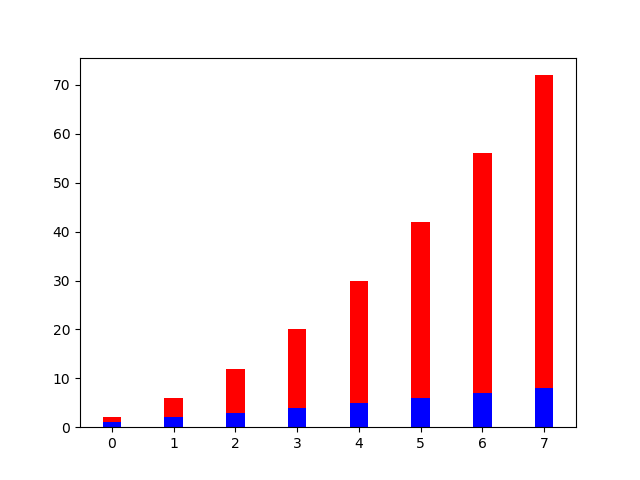

<BarContainer object of 8 artists>

In [46]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

Finally, we can pivot this bar graph into a horizontal bar graph by calling the barh function instead. But note that we have to change the bottom to a left and the width to a height.

<IPython.core.display.Javascript object>


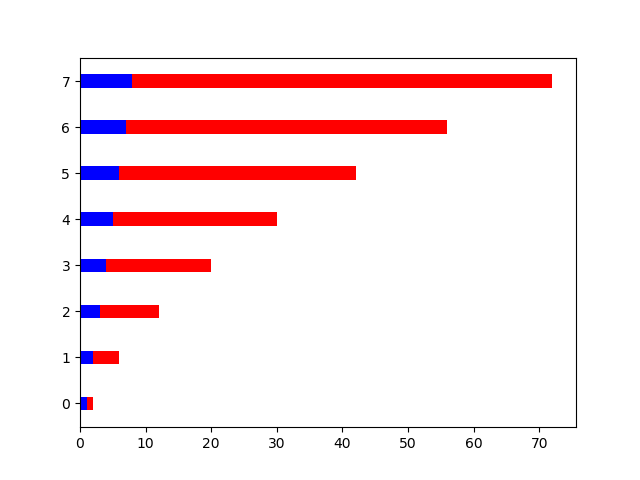

<BarContainer object of 8 artists>

In [48]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

# Dejunkifying a Plot

In [49]:
import pandas as pd

dict = {"Language": ["Python", "SQL", "Java", "C++", "JavaScript"],
         "Popularity": [56, 39, 34, 34, 29]}
langs = pd.DataFrame(dict)
print(langs)

     Language  Popularity
0      Python          56
1         SQL          39
2        Java          34
3         C++          34
4  JavaScript          29


Apparently the above was a waste of time because they gave me code to work with afterwards, that's fine. It's below, our goal is to remove all the ticks (both axes), and tick labels on the Y axis. 

<IPython.core.display.Javascript object>


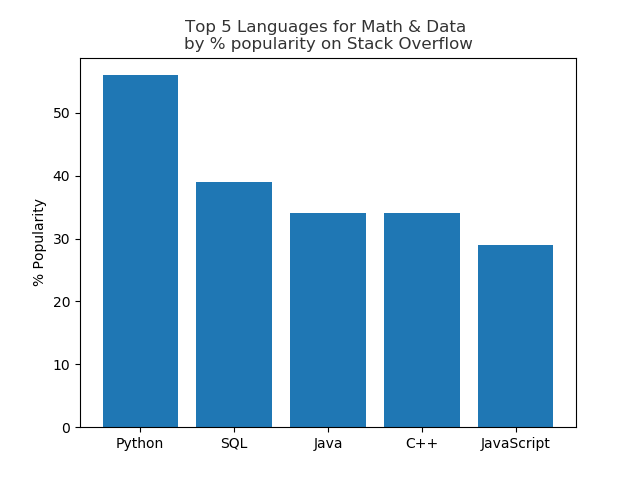

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis

plt.show()

<IPython.core.display.Javascript object>


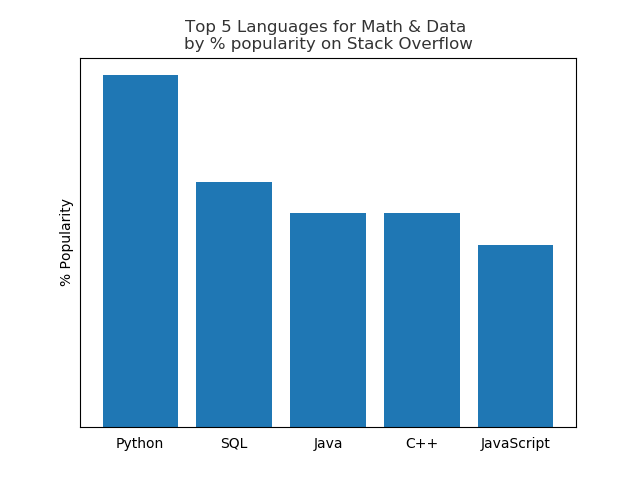

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [51]:
# Solution:

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

Now we want to remove the frame of the chart because God forbid there be any lines on this plot at all.

<IPython.core.display.Javascript object>


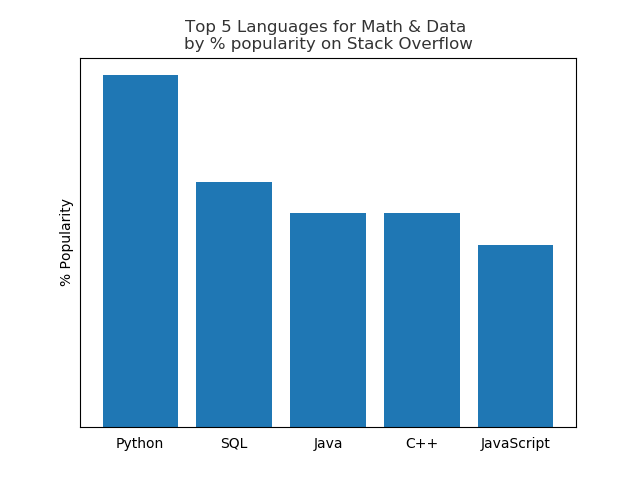

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# TODO: remove the frame of the chart

plt.show()

<IPython.core.display.Javascript object>


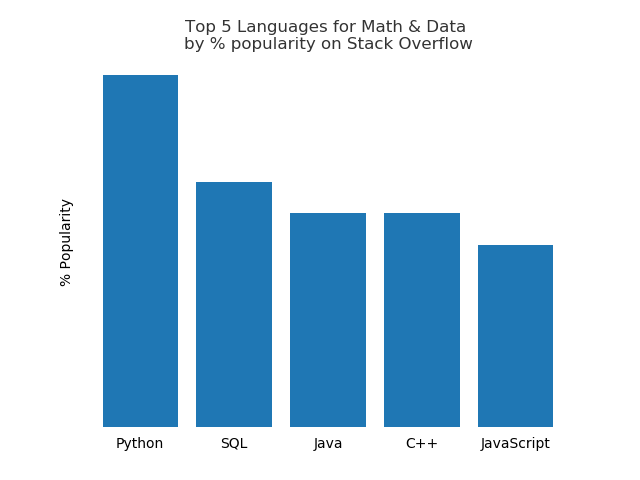

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [53]:
# Solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

Change the bar colors to be less bright blue, make one bar, the python bar, a contrasting color, soften all labels by turning grey. This is a genius task because the blue is ever so distracting. In fact one of my eyeballs just threw up from how disgusting that blue is (This is sarcasm, I'm just following the ideals of the course even if they're excessive and unecessary. I hate Michigan.)

<IPython.core.display.Javascript object>


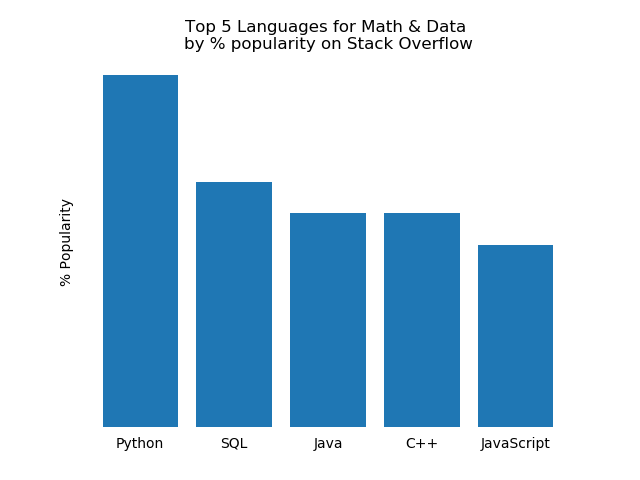

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
# TODO: change the bar colors to be less bright blue
# TODO: make one bar, the python bar, a contrasting color
plt.bar(pos, popularity, align='center')

# TODO: soften all labels by turning grey
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


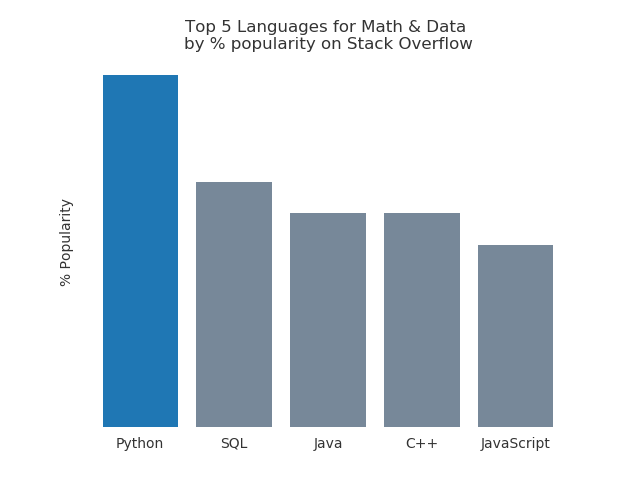

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [55]:
# Solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

Finally something halfway useful. Directly label each bar with Y axis values, and remove the Y label since bars are directly labeled.

<IPython.core.display.Javascript object>


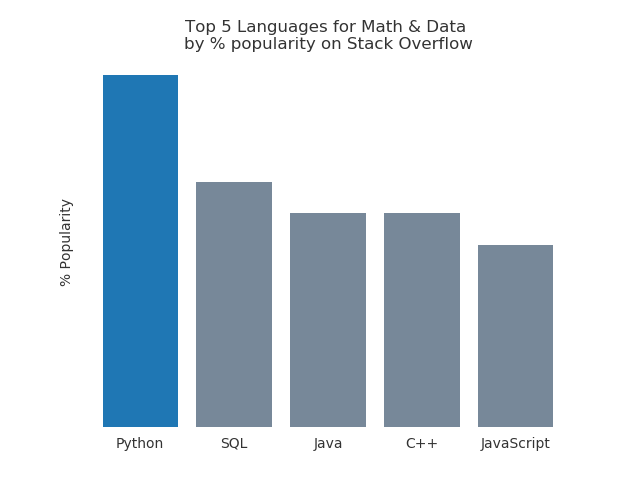

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

# TODO: remove the Y label since bars are directly labeled
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# TODO: direct label each bar with Y axis values
plt.show()

<IPython.core.display.Javascript object>


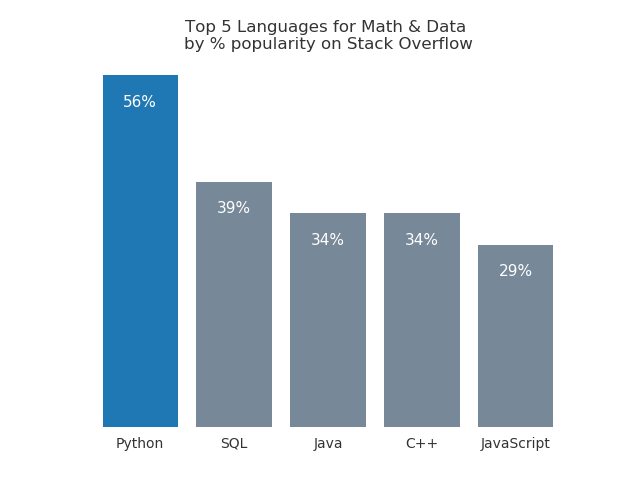

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [57]:
# Solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()